# Пример работы разработанных классов на реальной задачах.

In [2]:
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 594.1 kB/s  0:00:14m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 623.5 kB/s  0:00:34m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [39]:
np.random.seed(42)
random.seed(42)

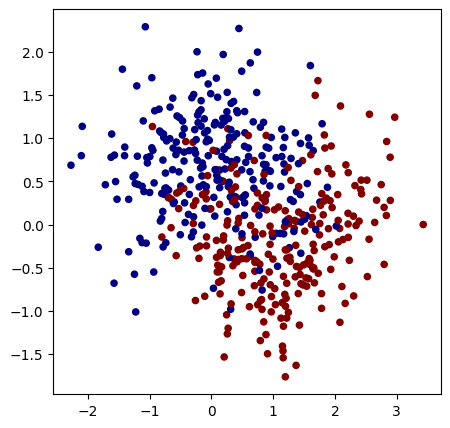

In [40]:
from sklearn.datasets import make_moons, make_blobs

X, y = make_moons(n_samples=500, noise=0.5)

y = y*2-1
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='jet')

In [41]:
model = MLP(2, [16, 16, 1])
print(model)
print(f'Number of parameteres: {len(model.parameters())}')

MLP of [Layer of [Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2), Relu Neuron(2)], Layer of [Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16), Relu Neuron(16)], Layer of [Relu Neuron(16)]]
Number of parameteres: 337


In [42]:
def loss(batch_size=None):
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    scores = list(map(model, inputs))
    losses = [(si - Value(float(yi)))**2 for yi, si in zip(yb, scores)]
    data_loss = sum(losses, Value(0.0)) * (1.0 / len(losses))

    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()), Value(0.0))
    total_loss = data_loss + reg_loss

    accuracy = [(yi > 0) == (si.data > 0) for yi, si in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.370493510156749) 0.598


In [43]:
for k in range(100):

    total_loss, acc = loss()

    model.zero_grad()
    total_loss.backward()

    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f'Step {k}, loss {total_loss.data}, accuracy {acc * 100}%')

Step 0, loss 1.370493510156749, accuracy 59.8%
Step 1, loss 1.0752992190870143, accuracy 72.0%
Step 2, loss 0.8753337993989336, accuracy 77.8%
Step 3, loss 0.8497593967305181, accuracy 78.8%
Step 4, loss 0.831996231925792, accuracy 79.2%
Step 5, loss 0.8244066148820925, accuracy 78.60000000000001%
Step 6, loss 0.8072931130666688, accuracy 79.80000000000001%
Step 7, loss 0.7799100319781493, accuracy 79.4%
Step 8, loss 0.6939821922496717, accuracy 82.39999999999999%
Step 9, loss 0.6813764862862992, accuracy 82.6%
Step 10, loss 0.7062121868182446, accuracy 81.6%
Step 11, loss 0.7015573581572867, accuracy 82.0%
Step 12, loss 0.6781406342519949, accuracy 83.0%
Step 13, loss 0.6713633373503572, accuracy 82.8%
Step 14, loss 0.6775759004504264, accuracy 83.0%
Step 15, loss 0.6704489858179968, accuracy 83.0%
Step 16, loss 0.6746981979989911, accuracy 82.8%
Step 17, loss 0.668534318763795, accuracy 83.0%
Step 18, loss 0.6689529230663712, accuracy 82.6%
Step 19, loss 0.6705622563695629, accuracy 

(-2.7619906995533157, 3.2380093004466843)

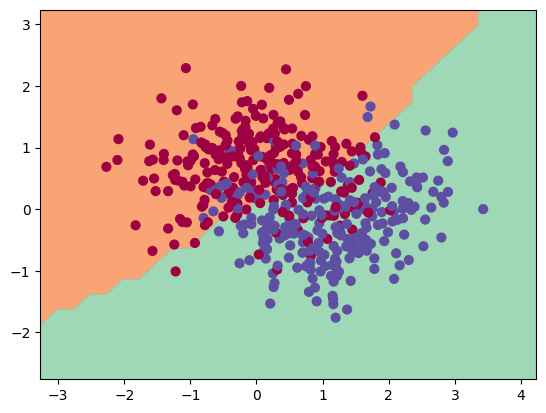

In [44]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())